In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/Proyecto_AI/images"
!ls

/content/drive/MyDrive/Proyecto_AI/images
images


# Data Augmentation

usamos ImageDataGenerator para generar imagenes nuevas en el ram mientras entrenamos para no desperdiciar espacio.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


path = "/content/drive/MyDrive/Proyecto_AI/images"

base_dir = 'images'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
							width_shift_range = 0.2,
							height_shift_range = 0.2,
							shear_range = 0.3,
							zoom_range = 0.3,
							horizontal_flip = True)
							



para ello tenemos que asignar una fuente base de imágenes a modificar, en este caso tomamos las de el directorio de train, en este caso solo estamos tomando una imagen y estamos mostrando como se generarían 5 imágenes diferentes:

Found 225 images belonging to 2 classes.


<Figure size 640x480 with 0 Axes>

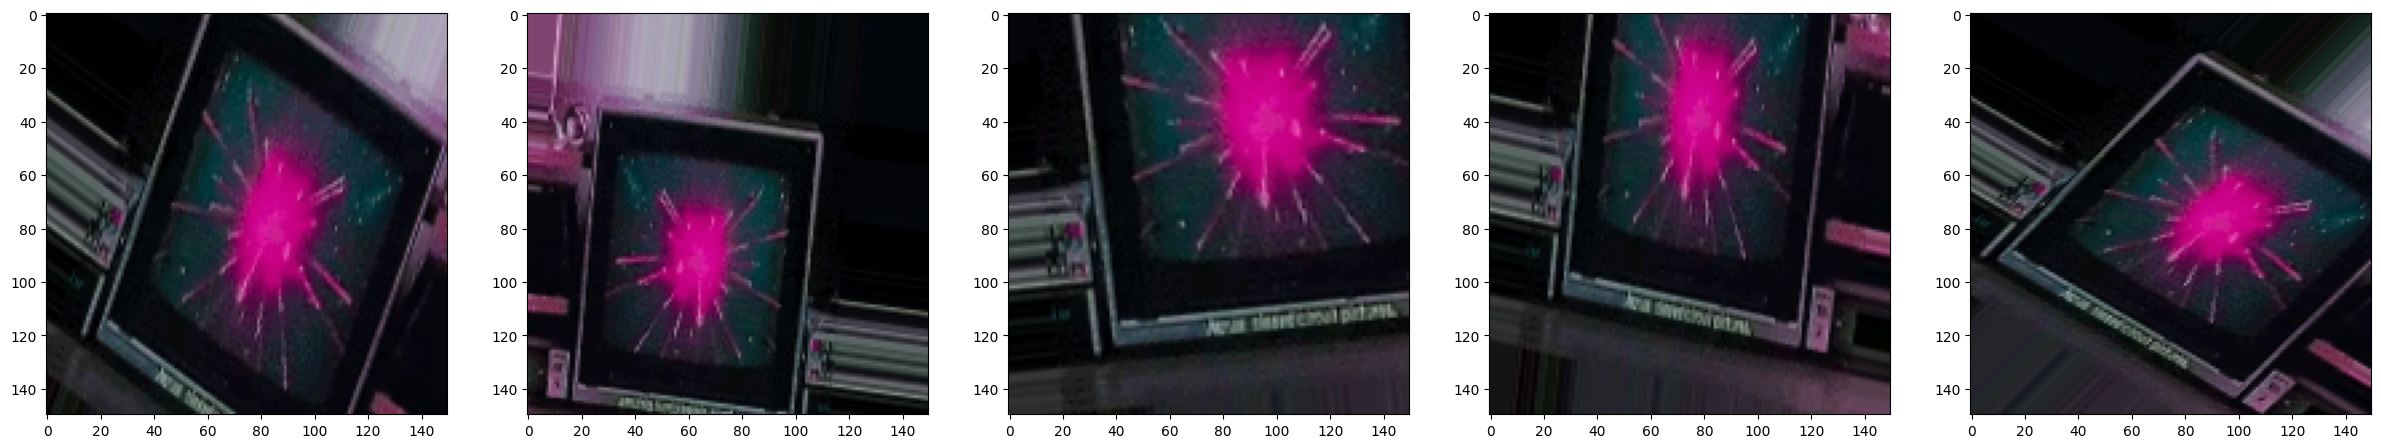

In [4]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 1,
							class_mode ='binary'
							)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8)) 

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

En este caso estamos tomando 8 imágenes y estomos modificando todas 1 vez cada una y las mostramos a manera de ejemplo.

Found 225 images belonging to 2 classes.
(8, 150, 150, 3)
[0. 1. 1. 0. 0. 1. 1. 1.]


<Figure size 640x480 with 0 Axes>

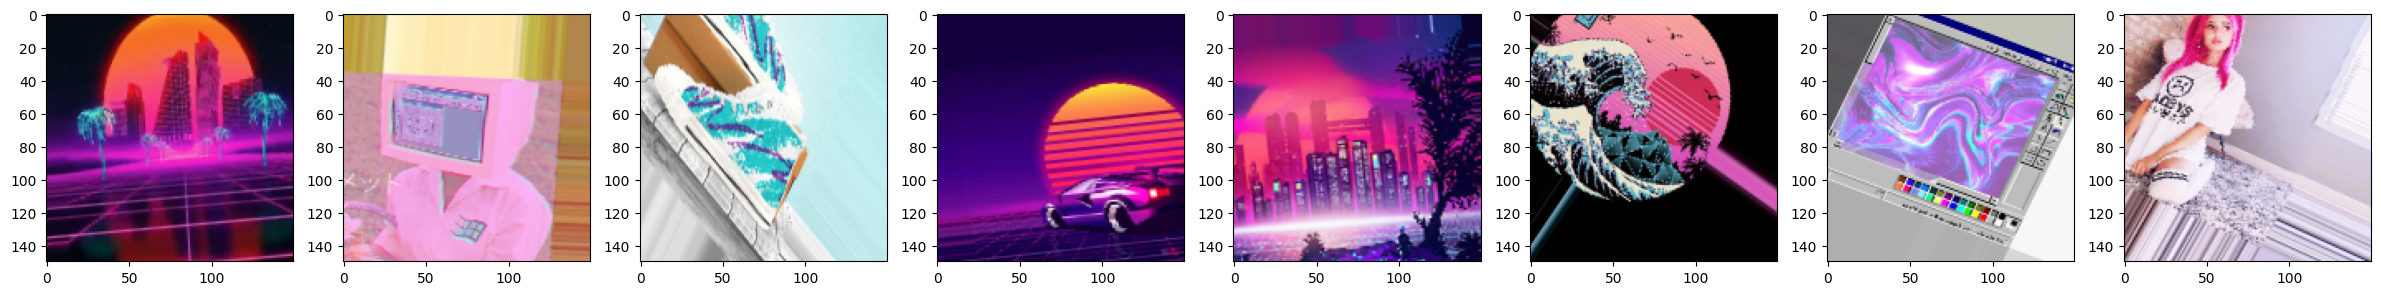

In [5]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='binary'
							)


images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4)) 

for i in range(images.shape[0]) :  
  axarr[i].imshow(images[i])

También podemos configurar la generación de imágenes para que cada una se salve en el disco duro, de esta forma podemos ver posteriormente con qué imágenes entrenó el modelo. 

In [7]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='binary',
							save_to_dir= path + '/augmented',   
              save_prefix='aug',
              save_format='png'
							)

Found 225 images belonging to 2 classes.


Esta es una red neuronal convolutiva:

In [73]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
						
model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (150,150,3)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', 
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 148, 148, 10)      280       
                                                                 
 flatten_11 (Flatten)        (None, 219040)            0         
                                                                 
 dense_47 (Dense)            (None, 256)               56074496  
                                                                 
 dense_48 (Dense)            (None, 128)               32896     
                                                                 
 dense_49 (Dense)            (None, 1)                 129       
                                                                 
Total params: 56,107,801
Trainable params: 56,107,801
Non-trainable params: 0
_________________________________________________________________


In [74]:
history = model.fit(
						train_generator, 
						epochs = 10)

Epoch 1/10
29/29 [==============================] - 23s 754ms/step - loss: 0.5101 - acc: 0.7378
Epoch 2/10
29/29 [==============================] - 23s 760ms/step - loss: 0.3648 - acc: 0.8356
Epoch 3/10
29/29 [==============================] - 21s 716ms/step - loss: 0.3696 - acc: 0.8489
Epoch 4/10
29/29 [==============================] - 22s 761ms/step - loss: 0.3865 - acc: 0.8400
Epoch 5/10
29/29 [==============================] - 21s 719ms/step - loss: 0.3359 - acc: 0.8756
Epoch 6/10
29/29 [==============================] - 22s 762ms/step - loss: 0.3324 - acc: 0.8622
Epoch 7/10
29/29 [==============================] - 21s 709ms/step - loss: 0.3375 - acc: 0.8533
Epoch 8/10
29/29 [==============================] - 22s 746ms/step - loss: 0.3431 - acc: 0.8667
Epoch 9/10
29/29 [==============================] - 21s 710ms/step - loss: 0.3259 - acc: 0.8711
Epoch 10/10
29/29 [==============================] - 22s 746ms/step - loss: 0.2913 - acc: 0.8844


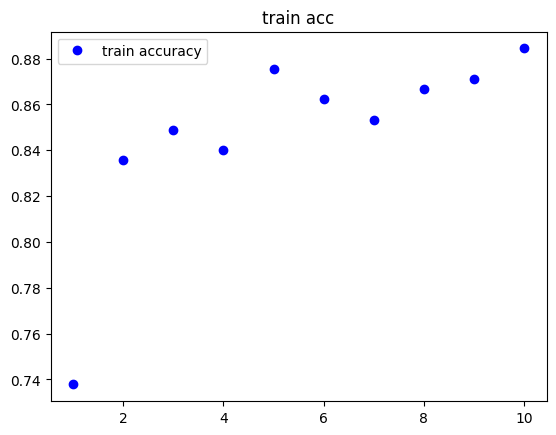

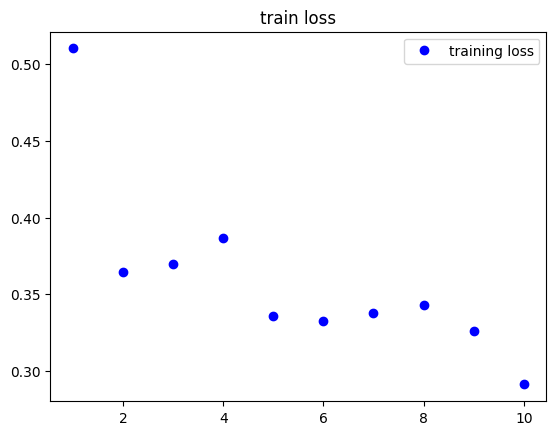

In [75]:
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [76]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc)


Found 40 images belonging to 2 classes.
 2/25 [=>............................] - ETA: 8s - loss: 36.5050 - acc: 0.8500 

25/25 [==============================] - 1s 17ms/step - loss: 36.5050 - acc: 0.8500

test acc :
 0.8500000238418579
